In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import pylab
from scipy.optimize import curve_fit
color_theme = ['#E3170A','#A9E5BB','#FCF6B1','#F7B32B','#2D1E2F']

params = {'legend.fontsize': 9,#'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 9,#'x-large',
         'axes.titlesize':9,#'x-large',
         'xtick.labelsize':9,#18,
         'ytick.labelsize':9}#18}
          
pylab.rcParams.update(params)
matplotlib.rcParams['font.family'] = ['sans-serif']
matplotlib.rcParams['font.sans-serif']='Arial'

# Read in ID values that have been calculated using the TopoPCF lab analysis Notebook

In [2]:
set_1_df = pd.read_csv('../Fibre Design/Single Shot Data/16_02_23/23.7cm 16_02_23 ID values set 1.csv', skiprows=0)# orig label.csv', skiprows=0)
set_1_df.set_index('Rotations', inplace=True)
set_2_df = pd.read_csv('../Fibre Design/Single Shot Data/16_02_23/23.7cm 16_02_23 ID values set 2.csv', skiprows=0)# orig label.csv', skiprows=0)
set_2_df.set_index('Rotations', inplace=True)
set_3_df = pd.read_csv('../Fibre Design/Single Shot Data/16_02_23/23.7cm 16_02_23 ID values set 3.csv', skiprows=0)# orig label.csv', skiprows=0)
set_3_df.set_index('Rotations', inplace=True)

combined = (set_1_df.Id.to_numpy() + set_2_df.Id.to_numpy() + set_3_df.Id.to_numpy())/3
combining = [set_1_df.Id.to_numpy(), set_2_df.Id.to_numpy(), set_3_df.Id.to_numpy()]

combined_unweight = (np.abs(set_1_df.Unweighted.to_numpy()) + np.abs(set_2_df.Unweighted.to_numpy()) + np.abs(set_3_df.Unweighted.to_numpy()))/3
# display(set_3_df)
# display(combined_unweight)
print(np.mean(combining,axis=0))
print(np.std(combining,axis=0))
print(combined_unweight)

[1.1065464  1.12585323 1.11543462 1.38257871 1.24938131 1.22143024
 1.26985809 1.2096763  1.10687683 1.14872428 1.0083348  1.0460553
 1.10457957 0.99675239 0.98288193]
[0.05150124 0.03919482 0.03240002 0.02412177 0.13342341 0.03341282
 0.1213384  0.06301352 0.03472205 0.04300514 0.03432745 0.02213977
 0.01378103 0.1067405  0.06163552]
[0.01701058 0.0214394  0.01993688 0.0344612  0.06273876 0.02012443
 0.06205745 0.13901796 0.13193309 0.13747224 0.13510993 0.19614082
 0.21218613 0.16189854 0.18290181]


## Read in spectra for RMS width calculation

In [9]:
spectra_location = '../Fibre Design/Single Shot Data/16_02_23/spectra/'
wavelengths_list_of_list = []
intensities_list_of_list = []
labels = ["%.2d" % i for i in range(15)]
for n in labels:
    print(n)
    spectra_n = pd.read_csv(spectra_location+'nath_16_02_{}.CSV'.format(n), skiprows=39, names=['Wavelength', 'Intensity'])
    wavelengths_list_of_list.append(spectra_n.Wavelength.to_numpy())
    intensities_list_of_list.append(spectra_n.Intensity.to_numpy())

print(wavelengths_list_of_list[0])

00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
[540.  540.4 540.8 541.2 541.6 542.  542.4 542.8 543.2 543.6 544.  544.4
 544.8 545.2 545.6 546.  546.4 546.8 547.2 547.6 548.  548.4 548.8 549.2
 549.6 550.  550.4 550.8 551.2 551.6 552.  552.4 552.8 553.2 553.6 554.
 554.4 554.8 555.2 555.6 556.  556.4 556.8 557.2 557.6 558.  558.4 558.8
 559.2 559.6 560.  560.4 560.8 561.2 561.6 562.  562.4 562.8 563.2 563.6
 564.  564.4 564.8 565.2 565.6 566.  566.4 566.8 567.2 567.6 568.  568.4
 568.8 569.2 569.6 570.  570.4 570.8 571.2 571.6 572.  572.4 572.8 573.2
 573.6 574.  574.4 574.8 575.2 575.6 576.  576.4 576.8 577.2 577.6 578.
 578.4 578.8 579.2 579.6 580.  580.4 580.8 581.2 581.6 582.  582.4 582.8
 583.2 583.6 584.  584.4 584.8 585.2 585.6 586.  586.4 586.8 587.2 587.6
 588.  588.4 588.8 589.2 589.6 590.  590.4 590.8 591.2 591.6 592.  592.4
 592.8 593.2 593.6 594.  594.4 594.8 595.2 595.6 596.  596.4 596.8 597.2
 597.6 598.  598.4 598.8 599.2 599.6 600.  600.4 600.8 601.2 601.6 602.
 602.4 60

In [4]:
def rms_width(datax, datay):

    norm = datay / np.sum(datay)
    meanx = np.sum(np.multiply(datax, norm))
    xzero = datax - meanx
    width = np.sqrt(np.sum(np.multiply(xzero**2, norm)))

    return width

In [5]:
rms_list = np.zeros(15)
for i in range(15):
    rms_list[i] = rms_width(wavelengths_list_of_list[i], intensities_list_of_list[i])

print(rms_list)

[30.32722657 30.00168672 29.9963717  29.5193855  29.25317471 27.56402541
 26.3632313  25.70717689 25.66729535 26.17953547 24.83534596 23.5713084
 22.23001754 21.25719176 20.0212517 ]


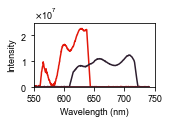

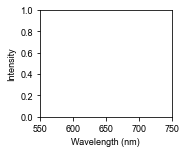

In [15]:
cm = 1/2.54
fig_spectra = plt.figure(figsize=(5.5*cm,3*cm))
fig_rms = plt.figure(figsize=(6*cm,5*cm))
ax_spectra = fig_spectra.add_subplot(111)
ax_rms = fig_rms.add_subplot(111)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

ax_spectra.plot(wavelengths_list_of_list[-1], intensities_list_of_list[-1]/np.sum(intensities_list_of_list[-1]), color=color_theme[0])
ax_spectra.plot(wavelengths_list_of_list[0], intensities_list_of_list[0]/np.sum(intensities_list_of_list[0]), color=color_theme[4])

norm = intensities_list_of_list[-1]/np.sum(intensities_list_of_list[-1])
meanx = np.sum(np.multiply(wavelengths_list_of_list[-1], norm))

step_x = np.array([wavelengths_list_of_list[-1][0], meanx-rms_list[-1]/2, 
                   meanx+rms_list[-1]/2, wavelengths_list_of_list[-1][-1]])
step_y = np.array([0,0, 0.008,0])#1/rms_list[-1],0])

norm_0 = intensities_list_of_list[0]/np.sum(intensities_list_of_list[0])
meanx_0 = np.sum(np.multiply(wavelengths_list_of_list[0], norm_0))
step_x_0 = np.array([wavelengths_list_of_list[0][0], meanx_0 - rms_list[0]/2, 
                   meanx_0 + rms_list[0]/2, wavelengths_list_of_list[0][-1]])
step_y_0 = np.array([0, 0,  0.008,0])#11/rms_list[0], 0])

ax_spectra.step(step_x, step_y, color=color_theme[0])
ax_spectra.step(step_x_0, step_y_0, color=color_theme[4])
ax_rms.set_xlim(550,750)
ax_spectra.set_xlim(550,750)
ax_spectra.set_xlabel('Wavelength (nm)')
ax_spectra.set_ylabel('Intensity')
ax_rms.set_xlabel('Wavelength (nm)')
ax_rms.set_ylabel('Intensity')
ax_spectra.set_ylim(0,0.01)
ax_spectra.yaxis.set_major_formatter(formatter)
fig_spectra.savefig('intensity spectra comparison osa small with rmswidth.svg', dpi=300)

plt.show()

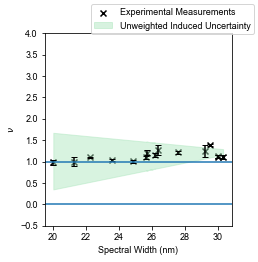

In [8]:
cm = 1/2.54
fig_id_quick = plt.figure(figsize=(8.5*cm, 9*cm))
# ax_id_quick = fig_id_quick.add_subplot(121)
ax_id_rms = fig_id_quick.add_subplot(111)
# ax_id_quick.scatter(np.arange(1,16), combined, color='black', marker='x' )
# ax_id_quick.errorbar(np.arange(1,16), combined, yerr=combined_unweight, fmt='none', ecolor='black', capsize=3)
# ax_id_quick.scatter(np.arange(1,16), set_2_df.Id, color='black', marker='x' )
# ax_id_quick.set_ylim(0,1.5)
# ax_id_rms.scatter(rms_list, np.mean(combining, axis=0)- combined_unweight)
# ax_id_rms.scatter(rms_list, np.mean(combining, axis=0)+ combined_unweight)
poly_order = 1
poly_fit_top = np.poly1d(np.polyfit(rms_list, np.mean(combining,axis=0)+3*np.abs(combined_unweight), poly_order))
poly_fit_bot = np.poly1d(np.polyfit(rms_list, np.mean(combining,axis=0)-3*np.abs(combined_unweight), poly_order))

ax_id_rms.scatter(rms_list, np.mean(combining,axis=0), color='black', marker='x', label='Experimental Measurements')
ax_id_rms.errorbar(rms_list, np.mean(combining,axis=0), yerr=np.std(combining, axis=0), fmt='none', ecolor='black', capsize=3)
# ax_id_rms.fill_between(rms_list,np.mean(combining,axis=0)-np.abs(combined_unweight), np.mean(combining,axis=0)+np.abs(combined_unweight), alpha=0.45, color=color_theme[1], label='Unweighted Induced Uncertainty')
ax_id_rms.fill_between(rms_list,poly_fit_bot(rms_list), poly_fit_top(rms_list), alpha=0.45, color=color_theme[1], label='Unweighted Induced Uncertainty')
ax_id_rms.set_ylabel(r'$\nu$')
ax_id_rms.set_xlabel('Spectral Width (nm)')
# ax_id_rms.invert_xaxis()
# ax_id_rms.scatter(rms_list, set_2_df.Id, color='black', marker='x' )
# ax_id_rms.errorbar(rms_list, set_2_df.Id, yerr=set_2_df.Unweighted, fmt='none', ecolor='black', capsize=3)
# ax_id_rms.scatter(rms_list, set_3_df.Id, color='black', marker='x' )
# ax_id_rms.errorbar(rms_list, set_3_df.Id, yerr=set_3_df.Unweighted, fmt='none', ecolor='black', capsize=3)
ax_id_rms.axhline(1.0)
ax_id_rms.axhline(0.0)
ax_id_rms.set_ylim(-0.5,4.0)
fig_id_quick.legend()
fig_id_quick.savefig('id against RMS width n=0 labelling small.svg')

In [19]:
print(np.mean(combining, axis=0))
print(combined_unweight)
print(np.mean(combining, axis=0)- combined_unweight)

[1.15757814 1.19017143 1.17524525 1.27919512 1.06116503 1.16105695
 1.08368576 0.79262243 0.71107756 0.73630757 0.603005   0.45763285
 0.46802117 0.51105677 0.43417649]
[0.01701058 0.0214394  0.01993688 0.0344612  0.06273876 0.02012443
 0.06205745 0.13901796 0.13193309 0.13747224 0.13510993 0.19614082
 0.21218613 0.16189854 0.18290181]
[1.14056756 1.16873203 1.15530838 1.24473392 0.99842628 1.14093252
 1.02162831 0.65360448 0.57914448 0.59883533 0.46789507 0.26149203
 0.25583504 0.34915822 0.25127468]


(100,)


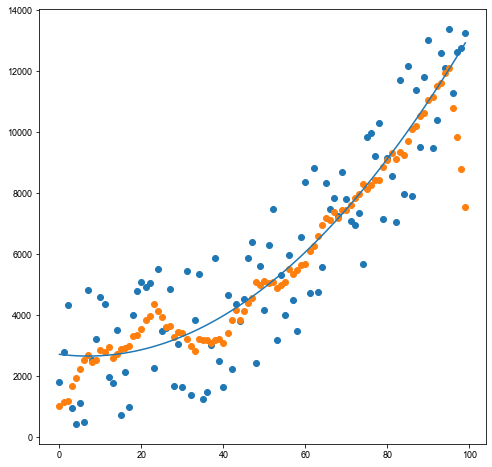

In [75]:
xtest = np.arange(100)
ytest = xtest**2 + 5000*np.random.rand(100)
mov_avg = np.convolve(ytest,np.ones(10)/10, mode='same')
poly_fit = np.polyfit(xtest, ytest, 2)
plt.scatter(xtest,ytest)
plt.scatter(xtest, mov_avg)
plt.plot(xtest, poly_fit[2]+poly_fit[1]*xtest + poly_fit[0]*xtest**2)
print(np.shape(mov_avg))

First set of twist data

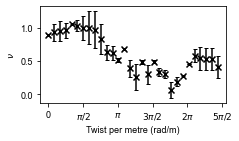

In [5]:
cm = 1/2.54
fig_twist_data = plt.figure(figsize=(8.5*cm,4.5*cm))
ax_twist_data = fig_twist_data.add_subplot(111)

id_twist_vals = np.array([0.89, 0.93, 0.95, 0.96, 1.05, 1.03, 1.00, 1.00, 0.97,
                          0.83, 0.63, 0.62, 0.52, 0.68, 0.39, 0.26, 0.49, 0.30,
                          0.49, 0.33, 0.31, 0.06, 0.19, 0.28, 0.46, 0.58, 0.54,
                          0.53, 0.53, 0.41])
unweighted_id_data = np.array([0.02, 0.13, 0.15, 0.11, 0.01, 0.08, 0.18, 0.25,
                               0.28, 0.23, 0.11, 0.10, 0.03, 0.01, 0.13, 0.20,
                               0.03, 0.14, 0.02, 0.06, 0.06, 0.12, 0.07, 0.01,
                               0.00, 0.10, 0.17, 0.17, 0.17, 0.17])
twist = 2*np.pi*np.arange(0,150, 5)/(360*0.33) 

poly_fit_id_twist = np.poly1d(np.polyfit(twist, id_twist_vals, 1))

ax_twist_data.scatter(twist, id_twist_vals, marker='x', color='black')
# ax_twist_data.plot(np.linspace(0, 5*np.pi/2, 100), poly_fit_id_twist(np.linspace(0, 5*np.pi/2, 100)))
ax_twist_data.errorbar(twist, id_twist_vals, yerr=unweighted_id_data, fmt='none', capsize=2, color='black', barsabove=False)
# ax_twist_data.fill_between(twist, id_twist_vals+unweighted_id_data, id_twist_vals-unweighted_id_data, alpha=0.3)
ax_twist_data.set_ylabel(r'$\nu$')
ax_twist_data.set_xlabel('Twist per metre (rad/m)')
ax_twist_data.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi, 5*np.pi/2])
ax_twist_data.set_xticklabels(['0', '$\pi /2$', '$\pi$', '$3\pi/2$', '$2\pi$', '$5\pi/2$'])
# ax_twist_data.set_xlim(0, *np.pi)

fig_twist_data.savefig('expt id as a function of twist small_new_2.svg', dpi=300)
plt.show()

second twist set - greater twist - less points


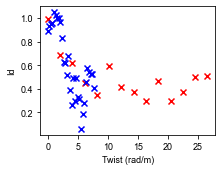

In [5]:
cm = 1/2.54
fig_twist_data_2 = plt.figure(figsize=(8*cm,6*cm))
ax_twist_data_2 = fig_twist_data_2.add_subplot(111)

id_twist_vals_2 = np.array([0.99, 0.69, 0.62, 0.45,
                            0.35, 0.59, 0.42, 0.37,
                            0.30, 0.47, 0.30, 0.37,
                             0.50, 0.51])
unweighted_id_data_2 = np.array([0.03,0.00,0.03,0.13,
                                 0.12,0.02,0.11,0.14,
                                 0.05,0.00,0.07,0.14,
                                 0.11,0.02])
twist_2 = 2*np.pi*np.arange(0,420, 30)/(360*0.256) 

ax_twist_data_2.scatter(twist_2, id_twist_vals_2, marker='x', color='red')
# ax_twist_data_2.errorbar(twist_2, id_twist_vals_2, yerr=unweighted_id_data_2, fmt='none', capsize=2, color='black', barsabove=False)

ax_twist_data_2.scatter(twist, id_twist_vals, marker='x', color='blue')
# ax_twist_data_2.errorbar(twist, id_twist_vals, yerr=unweighted_id_data, fmt='none', capsize=2, color='black', barsabove=False)
# ax_twist_data.fill_between(twist, id_twist_vals+unweighted_id_data, id_twist_vals-unweighted_id_data, alpha=0.3)
ax_twist_data_2.set_ylabel('Id')
ax_twist_data_2.set_xlabel('Twist (rad/m)')

plt.show()